# Optimal charging station location on a cycleway


Consider a long linear cycle path  as Vento (VENezia-TOrino), or the Danube cycle path. The cycle path usually runs along the banks of a river with scarse tourist interest. However, from the main course of the cycle path it is possible to reach places of tourist interest by making small detours.  

The rapid growth of e-bike ridership is proposing the problem of deploying a suitable charging infrastructure. The charging stations should be placed in strategic positions so as to guarantee a coverage of the whole cycle path. However, since the charging operations require a non negligible time, the charging station should be positioned in places where alternative activities could be carried out, as restaurants, museums, swimming pool, or other amenities. These places, called **Points of Interest (POI)**  are not on the main trajectory of the cyclepath, but the bikers must deviate to reach them.

We assume that the bikers enter the cyclepath where it begins and finish the trip ath the end of the cyclepath. When they enter the battery is fully charged. Moreover, the bikers will make all possible deviations in order to visit all the POIs.







## Formulation

To support the formulation we make use of a graph with $2n+2$ nodes.
Nodes $s$ and $t$ represent the extremes of the cyclepath.

Nodes

*   $L = \{1,\ldots,n\}$:  locations along the cyclepath from which bikers deviate


*   $H = \{1',\ldots, n'\}$:  POIs that may host a charging station.

*   $\{s,t\}$: extremes of the cyclepath.

Arcs

*  $\{(i,i+1), (i+1, i) 1,\ldots,n \}$: arcs of the cyclepath in the two directions

*  $\{(i,i'), (i',i), i\in L, i'\in H\}$: arcs representing the deviations from the cyclepath 

### Example of the graph
![picture](https://drive.google.com/file/d/1A4dSP-4K1E3jwaab4A8JT21TKD7FINaK/view?usp=drive_link)

### Parameters

*   $d_{i,i+1}, d_{i+1,i}, i=1,\ldots,n-1$: energy consumption between consecutive nodes,
*   $d_{i,i'}, d_{i',i}, i \in L, i'\in H$: energy consumption for the deviations
*   $c_i'$: cost of installing a charging station in site $i' \in H$
*   $\Delta$: maximum energy consumption between consecutive charging stations

We assume that $d_{s,1} d_{1,s} = d_{n,t} = d_{t,n} = 0$.
Note that the energy consumption on each arc can be different in the two directions, depending on the orography. 








## Problem 1

Consider a biker that traverses the cyclepath from $s$ to $t$, determine in which nodes of $H$ to install the charging stations so that the maximum energy consumption between two consecutive charging stations is no more than $\Delta$ and minimize the overall cost.



## Problem 2

Consider a biker that traverses the cyclepath from $t$ to $s$, determine in which nodes of $H$ to install the charging stations so that the maximum energy consumption between two consecutive charging stations is no more than $\Delta$ and minimize the overall cost.

### Comments
Do you obtain the same solution? Why?

### Recommendation
The problems can be solved by a simple formulation. The solution of complex problems as the TSP is not necessary.
Do not use external libraries apart from those presented in class.



In [53]:
#import libraries

!pip install mip
!pip install --upgrade cffi==1.15.0
import importlib
import matplotlib.pyplot as plot
import cffi
importlib.reload(cffi)
import numpy as np
import math
import networkx as nx

  Using cached cffi-1.15.0.tar.gz (484 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [24 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Nikte\AppData\Local\Temp\pip-install-rpnmlk8z\cffi_b1f84e31805f4c989726346580ecc8b1\setup.py", line 126, in <module>
          if sys.platform == "win32" and uses_msvc():
                                         ^^^^^^^^^^^
        File "C:\Users\Nikte\AppData\Local\Temp\pip-install-rpnmlk8z\cffi_b1f84e31805f4c989726346580ecc8b1\setup.py", line 105, in uses_msvc
          return config.try_compile('#ifndef _MSC_VER\n#error "not MSVC"\n#endif')
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Nikte\anaconda3\Lib\site-packages\setuptools\_distutils\command\config.py", line 223, in try_compile
          self._compile(body, heade

## Solution Problem 1

In [54]:
#data PROBLEM 1

n = 15  # number of nodes on the main course
n1 = 15 #number of touristic sites
delta = 50  # max distance before recharge
s = 0   # starting point
t = n  # destination
consumption = [20, 32, 11, 37, 7, 14, 22, 5, 35, 17, 23, 3, 26, 24] # consumption (in Wh) between two consecutive location along the main course
consumption_deviation = [1.1, 0.7, 0.4, 0.9, 2.1, 1.8, 0.5, 0.4, 1.6, 2.5, 1.4, 0.8, 2.0, 1.3, 0.1] # consumption (in Wh) of the deviation
inst_cost = [1492, 1789, 1914, 1861, 1348, 1769, 1123, 1432, 1564, 1818, 1901, 1265, 1642, 1712, 1756] #cost (in €) of installation of a charging point related to the node


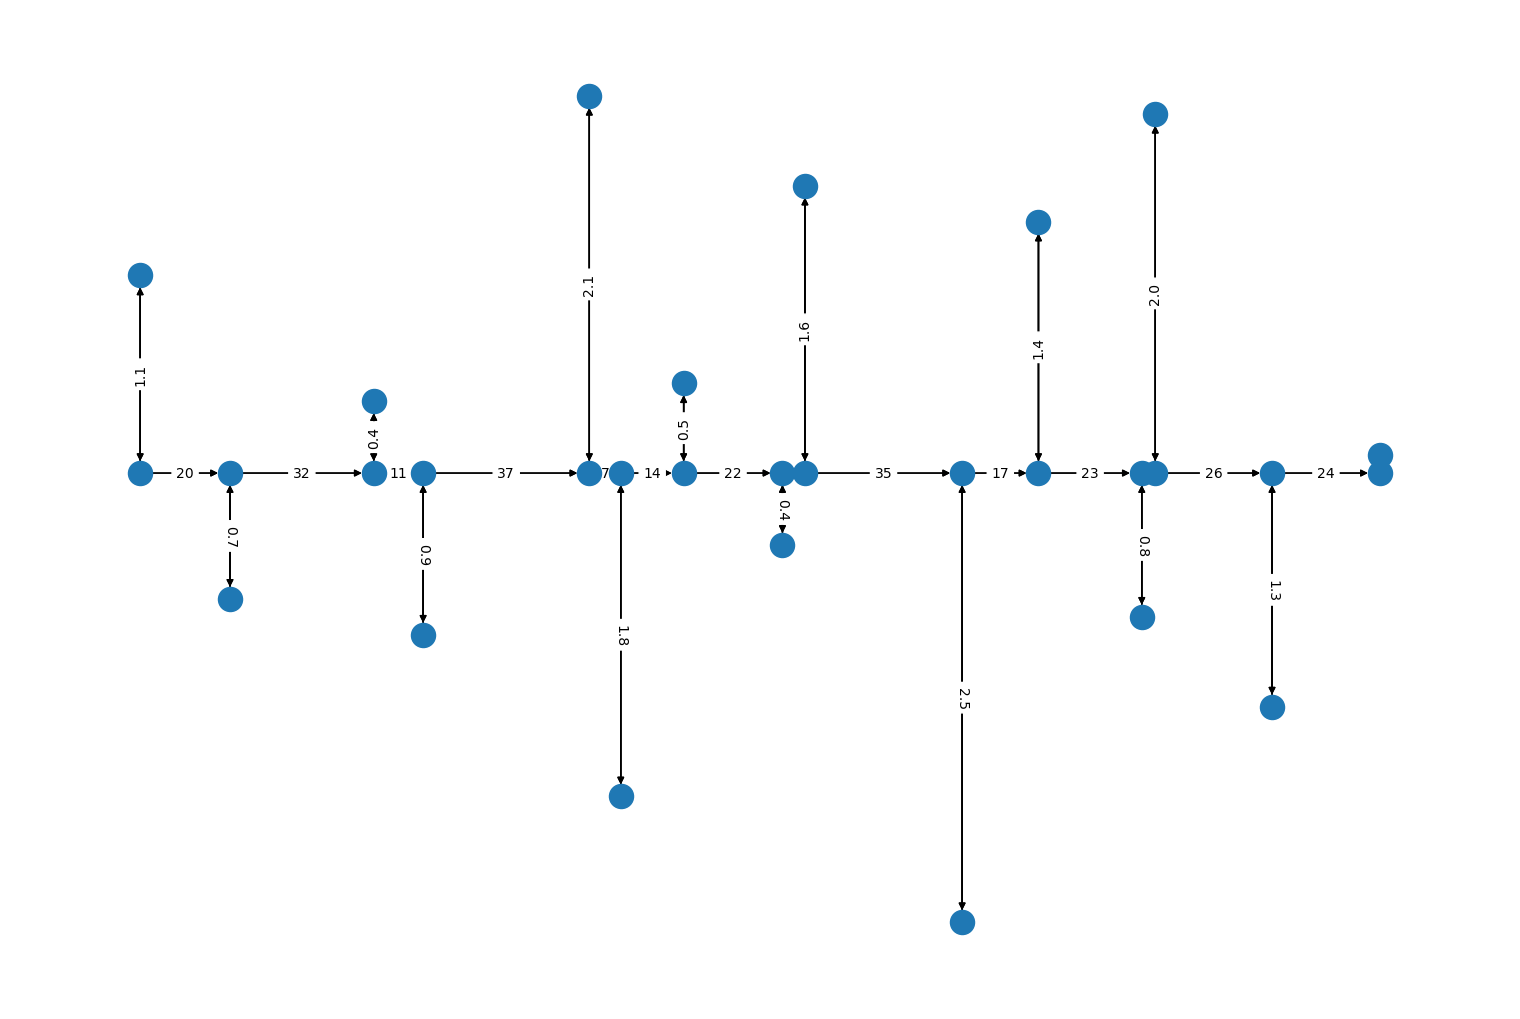

In [55]:
# lista della coordinata X dei nodi
x=[]
for i in range(len(consumption)): # aggiungo la coordinata X dei nodi sul percorso principale
    if i!=s:
        x.append(consumption[i]+x[i-1])
    else:   
        x.append(consumption[i]) 
x.insert(s,s) # aggiungo la coordinata X del primo nodo
y=[0]*len(x) # lista della coordinata Y dei nodi

# aggiungo le coordinate dei nodi POI
for i in range(n):
    x.append(x[i]) 
    if i%2==0: # controllo se indice pari o dispari per creare un grafo con POI alternati
        y.append(y[i]+consumption_deviation[i])
    else:
        y.append(y[i]-consumption_deviation[i])

nodes=np.column_stack((np.array(x),np.array(y))) # tabella con le coordinate di tutti i nodi

# elenchi nodi e archi da viusalizzare sul grafo
NODES=[i for i in range(len(nodes))]
EDGES=[(i,j) for i in NODES for j in NODES if i!=j and (nodes[i][0]==nodes[j][0] or (nodes[i][1]==nodes[j][1] and j==i+1))]

# creo lista pesi degli archi
weights=[i for p in zip(consumption,consumption_deviation) for i in p]
weights.extend(consumption_deviation[len(weights)//2:])

pos = {i: (nodes[i,0], nodes[i,1]) for i in NODES} # dizionario delle coordinate per la costruzione del grafo

# creazione grafo
graph = nx.DiGraph() # creo grafo orientato
graph.add_nodes_from(NODES) # aggiungo lista nodi al grafo
graph.add_edges_from(EDGES) # aggiungo lista archi al grafo
plot.figure(figsize=(15, 10)) 
nx.draw(graph, pos, node_size=300) # disegno nodi
nx.draw_networkx_edges(graph, pos) # disegno archi
edge_labels = {(i, j): w for (i, j), w in zip(EDGES, weights)} # lista etichette dei pesi
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels) # aggiungo etichette pesi
plot.show()

In [56]:
import mip
m = mip.Model() # creo modello da ottimizzare
x = [m.add_var(var_type=mip.BINARY) for i in range(n1)] # definisco variabili modello

# creo nuovo grafo con pesi, utile per calcolare i consumi tra un POI  e l'altro
G = nx.Graph()
G.add_nodes_from(NODES)
for i in range(len(weights)):
    G.add_edge(EDGES[i][0], EDGES[i][1], weight=weights[i])
    
# creo una tabella con indici POI consecutivi e consumi tra POI
shift=len(consumption_deviation) # variabile usata per spostare l'indice dei POI, che parte da 15
d_POI=[consumption_deviation[s]] # aggiungo consumo dal primo nodo al primo POI
n_start=[s] # aggiungo primo nodo visitato 
n_end=[shift] # aggiungo nodo di arrivo del primo arco
for i in range(shift,len(nodes)-1):
    for j in range(shift,len(nodes)):
        if j==i+1: # controllo per selezionare il POI successivo
            n_start.append(i)
            n_end.append(j)
            d_POI.append(nx.dijkstra_path_length(G,i,j,weight='weight')) # uso funzione della libreria networkx per calcolare il peso del cammino minimo tra i POI consecutivi
n_start.append(len(nodes)-1) # aggiungo l'ultimo POI
n_end.append(len(nodes)) # aggiungo l'ultimo nodo del percorso principale
d_POI.append(consumption_deviation[t-1]) # aggiungo il consumo tra l'ultimo POI e l'ultimo nodo
d_POI=np.column_stack((np.array(n_start),np.array(n_end),np.array(d_POI))) # creo tabella

# ciclo for per generare i vincoli
for i in range(len(NODES) - shift):
    distance_eff = d_POI[i][2] # distanza tra POI preso in considerazione e suo successivo
    j=i+1
    while j<shift: # ciclo per controllare la distanza con i POI successivi
        distance_eff += d_POI[j][2] 
        if distance_eff > delta: # controllo se i consumi non superino la massima distanza percorribile senza ricarica
            m.add_constr((mip.xsum(x[j] for j in range(i, j))) >= 1) 
            distance_eff = 0 # resetto la distnza
            j=shift # esco dal ciclo per il controllo della distanza
        j+=1


# ottimizzazione
m.objective = mip.minimize(mip.xsum(inst_cost[i] * x[i] for i in range(n1))) # minimizzo il costo di installazione totale
m.optimize()

<OptimizationStatus.OPTIMAL: 0>

In [57]:
# stampa  valori delle variabili del modello 
for i in range(n1):
    print(x[i].name,':',x[i].x)

# stampa soluzione modello
print(m.objective_value)

var(0) : 0.0
var(1) : 1.0
var(2) : 0.0
var(3) : 1.0
var(4) : 1.0
var(5) : 0.0
var(6) : 1.0
var(7) : 1.0
var(8) : 0.0
var(9) : 1.0
var(10) : 0.0
var(11) : 1.0
var(12) : 0.0
var(13) : 1.0
var(14) : 0.0
12348.0


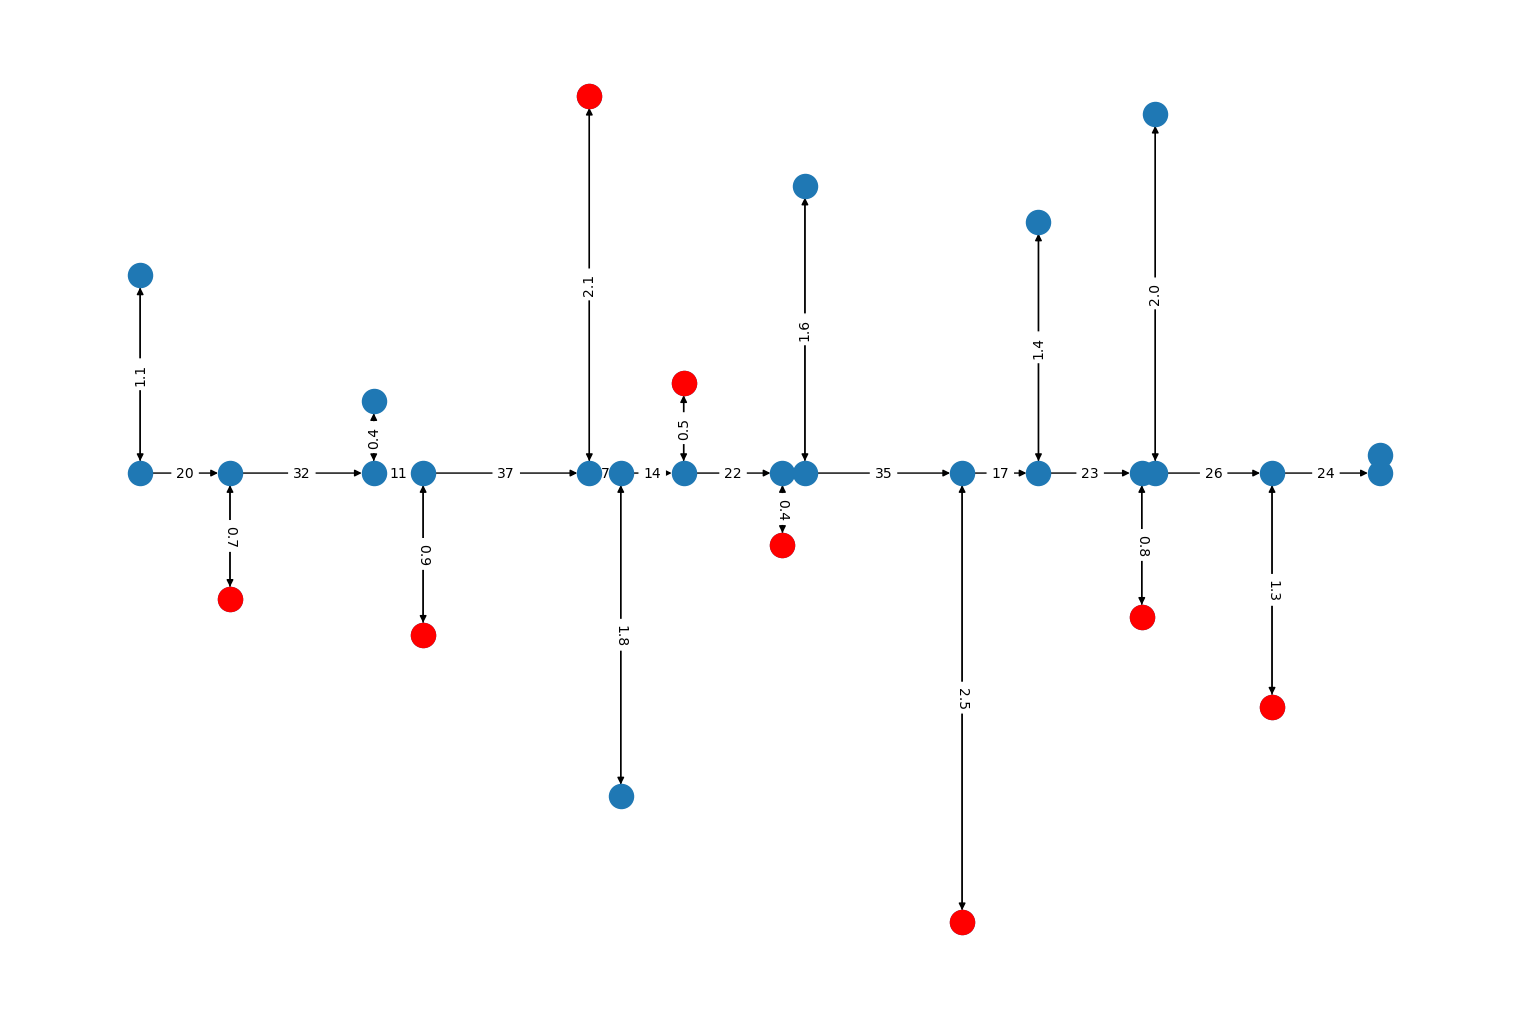

In [58]:
# creo lista di POI i cui inserisco le stazioni di ricarica
POI=[]
for i in range(n1):
    if x[i].x: # controllo se la variabile sia ==1
        POI.append(i+shift)

# evidenzio nel grafo precedentemente disegnato i POI in cui installo le stazioni di ricarica 
plot.figure(figsize=(15, 10))  
nx.draw(graph, pos, node_size=300)
nx.draw_networkx_nodes(graph, pos,  nodelist=POI, node_color="red")
edge_labels = {(i, j): w for (i, j), w in zip(EDGES, weights)}
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plot.show()

## Solution Problem 2

In [59]:
#data PROBLEM 2

n = 15  # number of nodes on the main course
n1 = 15 #number of touristic sites
delta = 50  # max distance before recharge
s = 0   # starting point
t = n  # destination
consumption = [12, 24, 7, 8, 35, 21, 19, 9, 31, 15, 21, 6, 23, 29] # consumption (in Wh) between two consecutive location along the main course
consumption_deviation = [1.7, 2.1, 1.1, 0.3, 0.4, 2.3, 0.2, 0.9, 2.1, 4.3, 5.2, 0.1, 2.8, 0.9, 0.1] # consumption (in Wh) of the deviation

#to compute the installation cost you have to bring the vector from the PROBLEM 1 and reverse it
inst_cost.reverse()

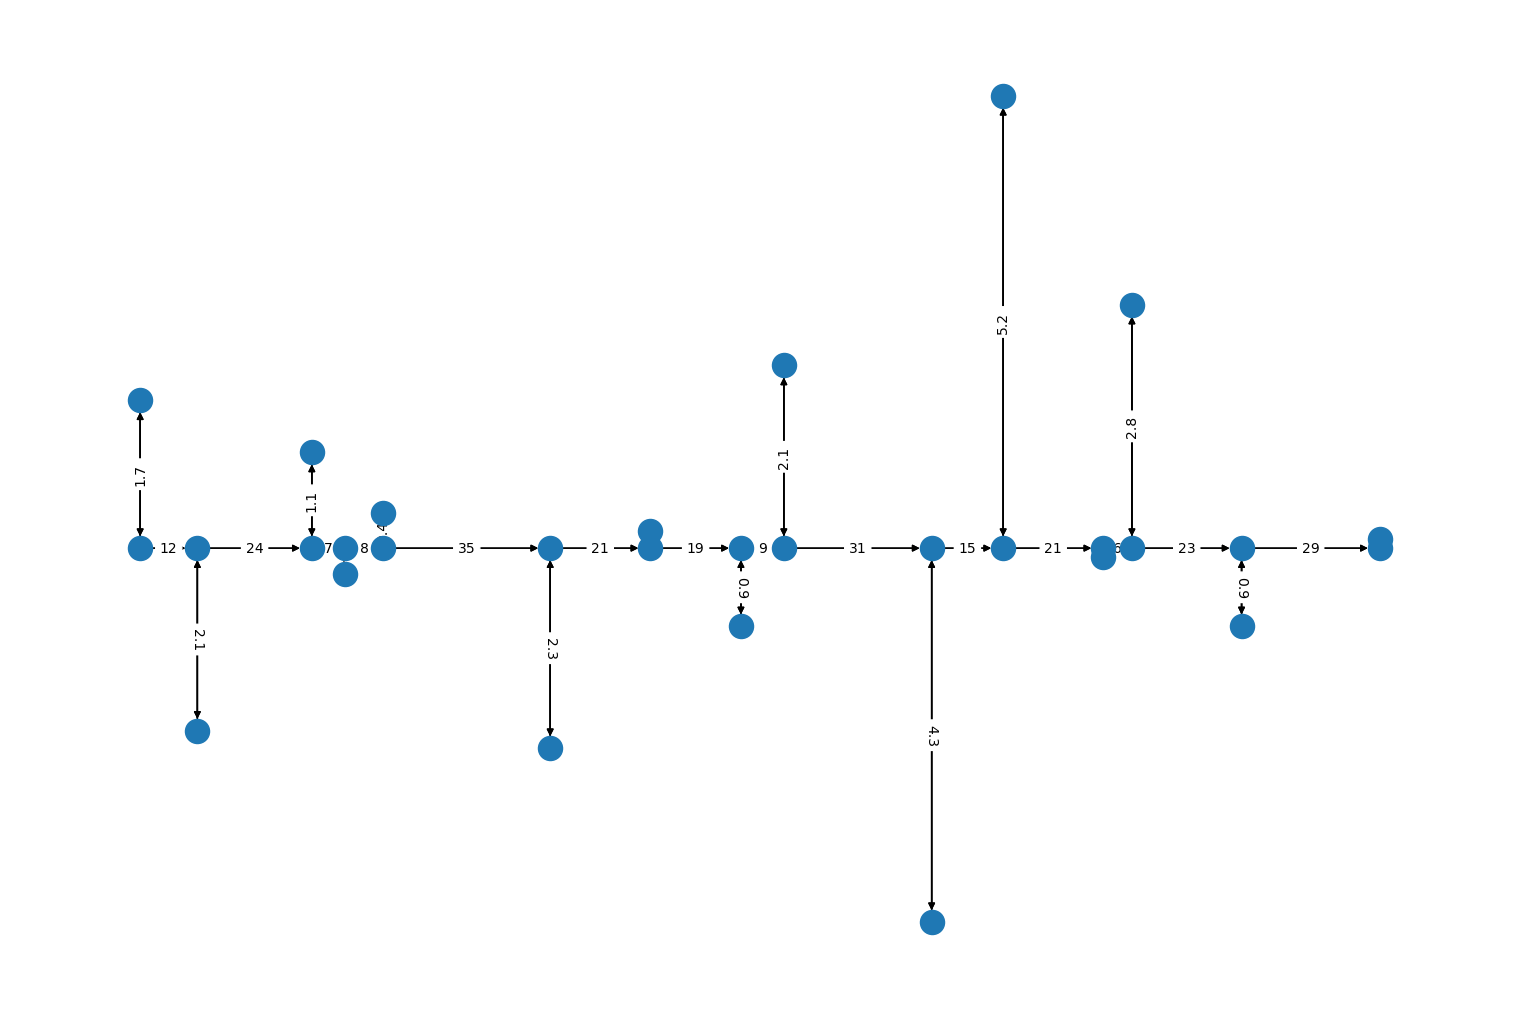

In [60]:
# lista della coordinata X dei nodi
x=[]
for i in range(len(consumption)): # aggiungo la coordinata X dei nodi sul percorso principale
    if i!=s:
        x.append(consumption[i]+x[i-1])
    else:   
        x.append(consumption[i]) 
x.insert(s,s) # aggiungo la coordinata X del primo nodo
y=[0]*len(x) # lista della coordinata Y dei nodi

# aggiungo le coordinate dei nodi POI
for i in range(n):
    x.append(x[i]) 
    if i%2==0: # controllo se indice pari o dispari per creare un grafo con POI alternati
        y.append(y[i]+consumption_deviation[i])
    else:
        y.append(y[i]-consumption_deviation[i])

nodes=np.column_stack((np.array(x),np.array(y))) # tabella con le coordinate di tutti i nodi

# elenchi nodi e archi da viusalizzare sul grafo
NODES=[i for i in range(len(nodes))]
EDGES=[(i,j) for i in NODES for j in NODES if i!=j and (nodes[i][0]==nodes[j][0] or (nodes[i][1]==nodes[j][1] and j==i+1))]

# creo lista pesi degli archi
weights=[i for p in zip(consumption,consumption_deviation) for i in p]
weights.extend(consumption_deviation[len(weights)//2:])

pos = {i: (nodes[i,0], nodes[i,1]) for i in NODES} # dizionario delle coordinate per la costruzione del grafo

# creazione grafo
graph = nx.DiGraph() # creo grafo orientato
graph.add_nodes_from(NODES) # aggiungo lista nodi al grafo
graph.add_edges_from(EDGES) # aggiungo lista archi al grafo
plot.figure(figsize=(15, 10)) 
nx.draw(graph, pos, node_size=300) # disegno nodi
nx.draw_networkx_edges(graph, pos) # disegno archi
edge_labels = {(i, j): w for (i, j), w in zip(EDGES, weights)} # lista etichette dei pesi
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels) # aggiungo etichette pesi
plot.show()

In [61]:
import mip
m = mip.Model() # creo modello da ottimizzare
x = [m.add_var(var_type=mip.BINARY) for i in range(n1)] # definisco variabili modello

# creo nuovo grafo con pesi, utile per calcolare i consumi tra un POI  e l'altro
G = nx.Graph()
G.add_nodes_from(NODES)
for i in range(len(weights)):
    G.add_edge(EDGES[i][0], EDGES[i][1], weight=weights[i])
    
# creo una tabella con indici POI consecutivi e consumi tra POI
shift=len(consumption_deviation) # variabile usata per spostare l'indice dei POI, che parte da 15
d_POI=[consumption_deviation[s]] # aggiungo consumo dal primo nodo al primo POI
n_start=[s] # aggiungo primo nodo visitato 
n_end=[shift] # aggiungo nodo di arrivo del primo arco
for i in range(shift,len(nodes)-1):
    for j in range(shift,len(nodes)):
        if j==i+1: # controllo per selezionare il POI successivo
            n_start.append(i)
            n_end.append(j)
            d_POI.append(nx.dijkstra_path_length(G,i,j,weight='weight')) # uso funzione della libreria networkx per calcolare il peso del cammino minimo tra i POI consecutivi
n_start.append(len(nodes)-1) # aggiungo l'ultimo POI
n_end.append(len(nodes)) # aggiungo l'ultimo nodo del percorso principale
d_POI.append(consumption_deviation[t-1]) # aggiungo il consumo tra l'ultimo POI e l'ultimo nodo
d_POI=np.column_stack((np.array(n_start),np.array(n_end),np.array(d_POI))) # creo tabella

# ciclo for per generare i vincoli
for i in range(len(NODES) - shift):
    distance_eff = d_POI[i][2] # distanza tra POI preso in considerazione e suo successivo
    j=i+1
    while j<shift: # ciclo per controllare la distanza con i POI successivi
        distance_eff += d_POI[j][2] 
        if distance_eff > delta: # controllo se i consumi non superino la massima distanza percorribile senza ricarica
            m.add_constr((mip.xsum(x[j] for j in range(i, j))) >= 1) 
            distance_eff = 0 # resetto la distnza
            j=shift # esco dal ciclo per il controllo della distanza
        j+=1


# ottimizzazione
m.objective = mip.minimize(mip.xsum(inst_cost[i] * x[i] for i in range(n1))) # minimizzo il costo di installazione totale
m.optimize()

<OptimizationStatus.OPTIMAL: 0>

In [62]:
# stampa  valori delle variabili del modello 
for i in range(n1):
    print(x[i].name,':',x[i].x)

# stampa soluzione modello
print(m.objective_value)

var(0) : 0.0
var(1) : 0.0
var(2) : 1.0
var(3) : 1.0
var(4) : 0.0
var(5) : 1.0
var(6) : 0.0
var(7) : 1.0
var(8) : 0.0
var(9) : 1.0
var(10) : 1.0
var(11) : 1.0
var(12) : 0.0
var(13) : 1.0
var(14) : 0.0
12924.0


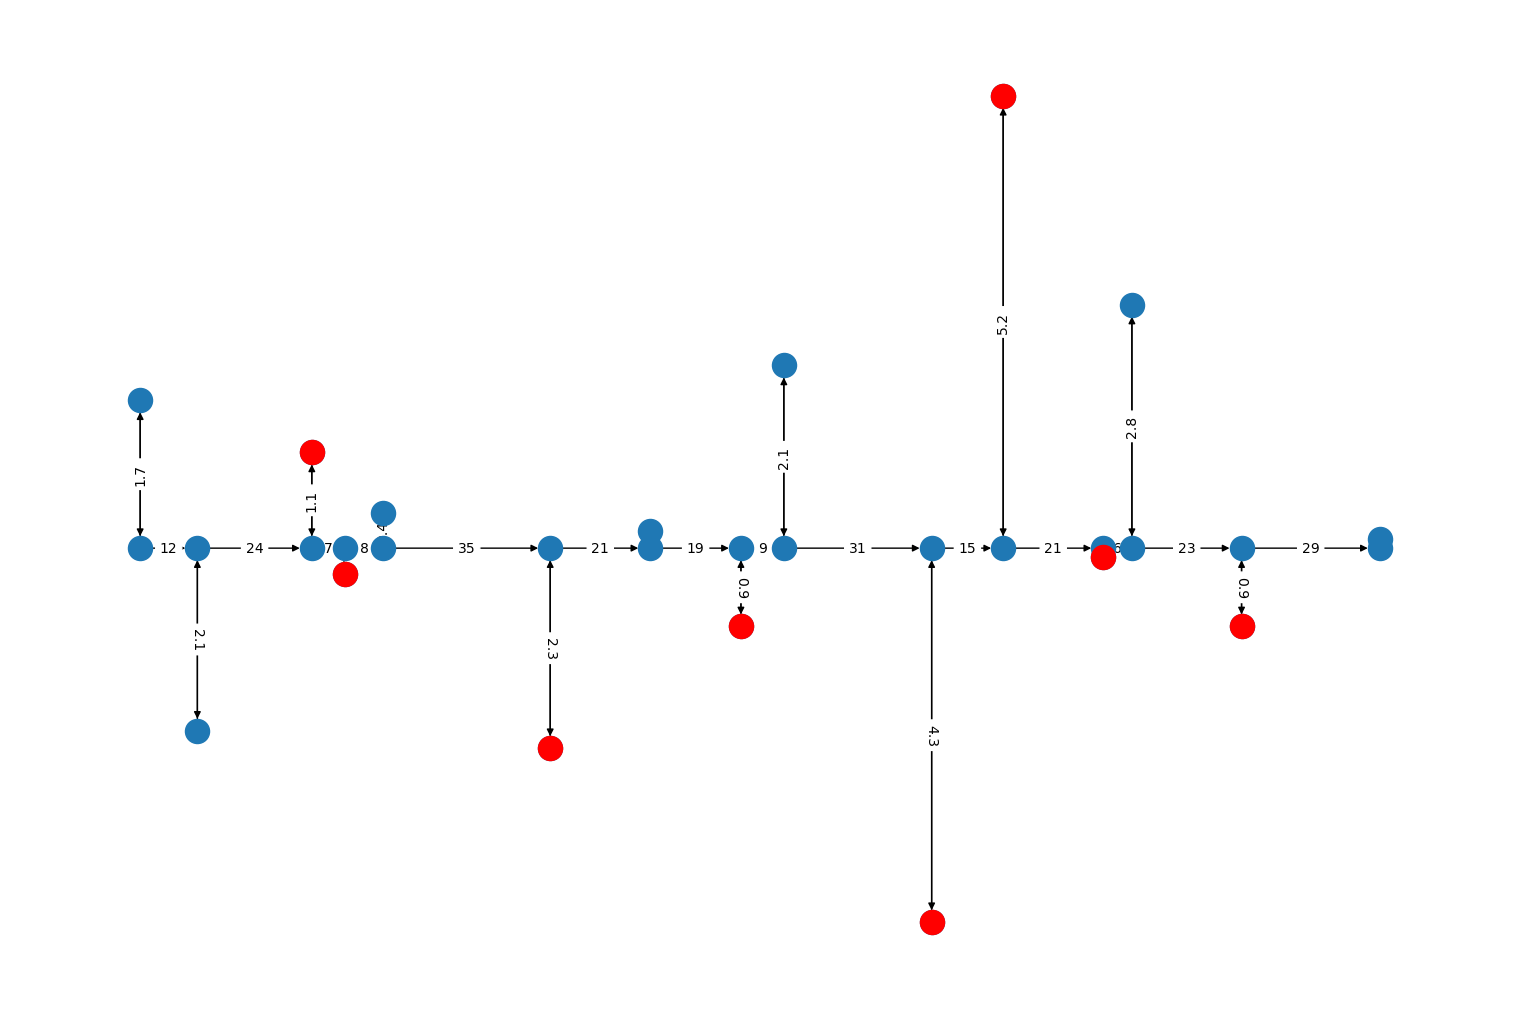

In [63]:
# creo lista di POI i cui inserisco le stazioni di ricarica
POI=[]
for i in range(n1):
    if x[i].x: # controllo se la variabile sia ==1
        POI.append(i+shift)

# evidenzio nel grafo precedentemente disegnato i POI in cui installo le stazioni di ricarica 
plot.figure(figsize=(15, 10))  
nx.draw(graph, pos, node_size=300)
nx.draw_networkx_nodes(graph, pos,  nodelist=POI, node_color="red")
edge_labels = {(i, j): w for (i, j), w in zip(EDGES, weights)}
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plot.show()

## Comment

Do you obtain the same solution? Why?

Andrea Venezia 10797678

Nicolò Terzoli 10811785


L'obiettivo del progetto era quello di posizionare le stazioni di ricarica nei POI in modo tale da minimizzare il costo di installazione delle stazioni e garantire che il consumo energetico tra due stazioni consecutive sia minore di $\Delta (50)$.

Nel problema 1 la pista ciclabile viene attraversata da $s \rightarrow t$, mentre nel problema 2 la pista viene attraversata in senso opposto; nei due problemi, infatti, i vettori *consumption* e *consumption\_deviation* sono diversi, proprio per via del diverso senso di percorrenza del percorso.

Questo implica che le soluzioni ottenute siano diverse, infatti:

- **Problema 1:**
  - Costo di installazione: 12348.0
  - POI con stazioni di ricarica: $2', 4', 5', 7', 8', 10', 12', 14'$

- **Problema 2:**
  - Costo di installazione: 12924.0
  - POI con stazioni di ricarica: $2', 4', 5', 6', 8', 10', 12', 13'$

L'unica differenza nella risoluzione dei due problemi è esclusivamente l'inversione del vettore *inst\_cost* (vettore dei costi di installazione) nella risoluzione del problema 2, dal momento che il percorso viene percorso in senso opposto.

Ergo, il fatto che le due soluzioni ottenute siano differenti può essere giustificato semplicemente dal fatto che i vettori dei consumi siano diversi per via della differente configurazione del percorso a seconda del senso di percorrenza della pista.


#   Codice:

Per la realizzazione dei grafi abbiamo fatto riferimento alla libreria networkx. Abbiamo iniziato definendo l'insieme dei nodi, con le relative coordinate e degli archi, con i relativi pesi. Dopo di che abbiamo realizzato il grafo evidenziando in rosso, dopo ogni sezione di ottimizzazione, i nodi in cui sono presenti le stazioni di ricarica. 


Per la parte riguardante il modello, in seguito ad una formulazione teorica del problema, abbiamo implementato quanto verificato dal punto di vista teorico: 

**Variabili:**

Per poter definire in quali POI vadano inserite le stazioni di ricarica, è stato necessario introdurre una variabile binaria x, sotto forma di vettore, in modo tale che quest'ultima risultasse pari ad 1 nel caso in cui vi fosse una stazione nel POI i 

\begin{equation}
x_i =
\begin{cases}
  1\ se\ nel\ POI\ i\ c'è\ una\ colonnina \\
  0\ altrimenti
\end{cases}
\end{equation} \\

L'implementazione nel codice della variabile x è avvenuta nel seguente modo: 

x = [m.add_var(var_type=mip.BINARY) for i in range(n1)]


**Vincolo:**

Dopo aver calcolato tutte le distanze tra le coppie di POI successivi, nell'array *d_POI*, è stato necessario imporre i vincoli sulla variabile x.

Dal punto di vista teorico abbiamo prima ottenuto il seguente vincolo lineare: 

Data $d_{i, j}$ l'energia consumata tra i nodi i e j, ∀i, j ∈ H,


$\sum_{k=i}^{j-1} d_{k, k+1} \leq \Delta + M (1 - x_j)$

dove M è una costante grande abbastanza da disattivare il vincolo quando $x_j = 0$. L'implementazione di tale vincolo nel codice è avvenuta nel modo seguente:  

$\sum_{k=i}^{j-1} d_{k, k+1} > \Delta \implies \sum_{k=i}^{j} x_k \geq 1$

Questa formulazione garantisce la presenza di almeno una stazione di ricarica tra due POI i e j, nel momento in cui il consumo energetico per spostarsi tra i due supera $\Delta$.

L'implementazione nel codice è avvenuta tramite la funzione *add_constr*:

m.add_constr((mip.xsum(x[j] for j in range(i, j))) >= 1)


**Funzione Obbiettivo:**

Lo scopo di entrambi i problemi era quello di minimizzare i costi di installazzione, ciò si è tradotto nella seguente funzione obbiettivo: 

$min{\sum_{i \in H} x_i*c_i}$

dove $c_i$ rappresenta il costo di installazzione della stazione nel POI i, indicato nella variabile *inst_cost*.

L'implementazione nel codice è avvenuta tramite la funzione *minimize*:

m.objective = mip.minimize(mip.xsum(inst_cost[i] * x[i] for i in range(n1)))